In [13]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [14]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [15]:
from networks import lenet_mnist

branchyNet = lenet_mnist.get_network()
if cuda.available:
    branchyNet.to_gpu()
branchyNet.training()

Import Data

In [17]:
from datasets import mnist
training_size=10000
x_train, y_train, x_test, y_test = mnist.get_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train, y_train, x_test, y_test = x_train[:training_size*6], y_train[:training_size*6], x_test[:training_size], y_test[:training_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


#x_test = x_train + x_test
#y_test = y_train + y_test
#training size = 6000, each epoch we need to 12 seconds.
#this app need 28 cores and at least 3GB memory for UTSA server when training size is 6000.x_test

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))
((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))


/home/peng/cooperating/venv/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/peng/cooperating/venv/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
import numpy as np
data_dir = "/home/peng/cooperating/project/data_model1/0.0001/"
# read training data
number_of_samples = 60000
x_train_data = np.loadtxt(data_dir + "X_encoder_train.txt")
x_train = x_train_data.reshape(number_of_samples, 1, 28, 28)

In [10]:
x_train = x_train_data.reshape(number_of_samples, 1, 28, 28)
print(x_train.shape)

(60000, 1, 28, 28)


Settings

In [11]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 100

Train Main Network

In [18]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

1634255737.87
1634255853.94
1634255968.64
1634256083.56
1634256198.71
1634256313.59
1634256428.03
1634256543.16
1634256658.64
1634256774.4
1634256889.1
1634257004.47
1634257119.74
1634257236.05
1634257351.38
1634257466.29
1634257582.12
1634257696.71
1634257811.44
1634257926.91
1634258043.22
1634258158.21
1634258274.12
1634258389.61
1634258504.91
1634258620.33
1634258734.74
1634258851.16
1634258966.75
1634259081.64
1634259197.17
1634259313.49
1634259428.63
1634259543.9
1634259659.37
1634259774.78
1634259889.52
1634260006.11
1634260121.67
1634260237.79
1634260353.03
1634260468.29
1634260584.36
1634260698.41
1634260813.32
1634260928.66
1634261044.23
1634261159.47
1634261275.12
1634261390.11
1634261505.8
1634261620.63
1634261736.05
1634261851.5
1634261967.71
1634262083.25
1634262199.18
1634262313.58
1634262428.8
1634262543.95
1634262660.54
1634262776.24
1634262891.59
1634263007.74
1634263122.86
1634263238.15
1634263352.69
1634263469.68
1634263585.46
1634263701.01
1634263816.97
1634263932.8

Train BranchyNet

In [19]:
#TRAIN_NUM_EPOCHS = 100
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

1634267309.46
1634267475.81
1634267644.8
1634267813.26
1634267981.07
1634268148.95
1634268316.6
1634268483.81
1634268654.28
1634268823.29
1634268995.74
1634269169.14
1634269341.32
1634269515.01
1634269688.9
1634269862.54
1634270036.16
1634270210.55
1634270384.87
1634270558.15
1634270731.36
1634270904.49
1634271077.38
1634271251.83
1634271425.22
1634271598.35
1634271771.4
1634271945.81
1634272118.51
1634272292.68
1634272465.49
1634272639.92
1634272815.35
1634272991.25
1634273166.41
1634273340.9
1634273524.27
1634273718.47
1634273912.43
1634274107.14
1634274297.27
1634274471.53
1634274645.78
1634274820.29
1634274999.71
1634275173.89
1634275353.92
1634275527.37
1634275700.91
1634275876.26
1634276049.92
1634276223.39
1634276396.77
1634276568.55
1634276741.95
1634276913.45
1634277085.91
1634277260.59
1634277434.21
1634277606.99
1634277780.92
1634277953.93
1634278127.16
1634278300.34
1634278473.59
1634278647.74
1634278820.7
1634278995.02
1634279168.85
1634279343.37
1634279517.23
1634279692.4

Visualizing Network Training

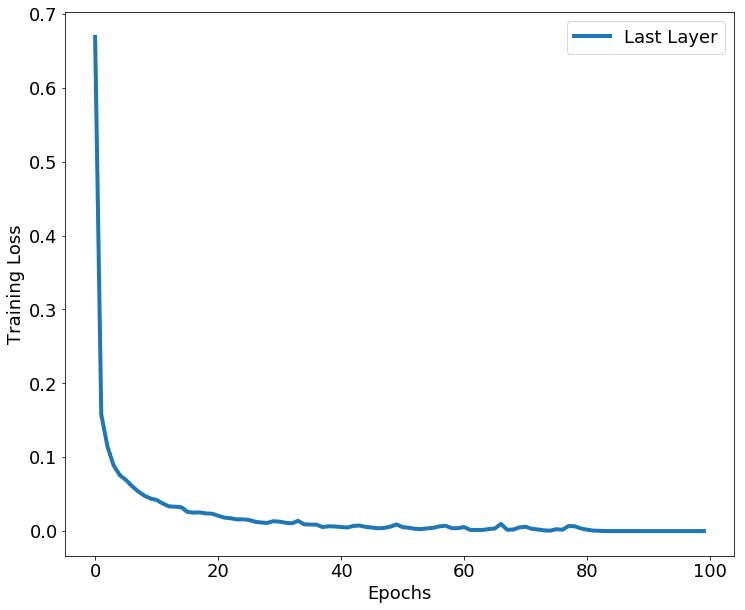

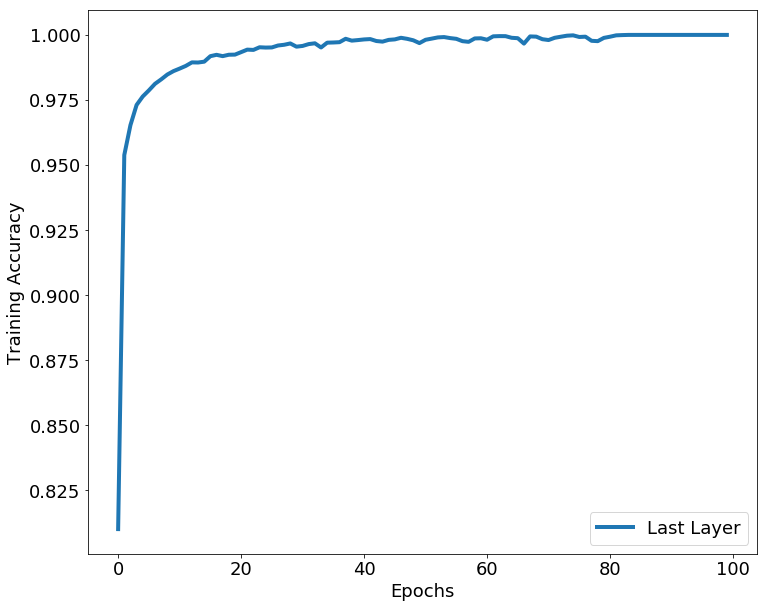

In [20]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

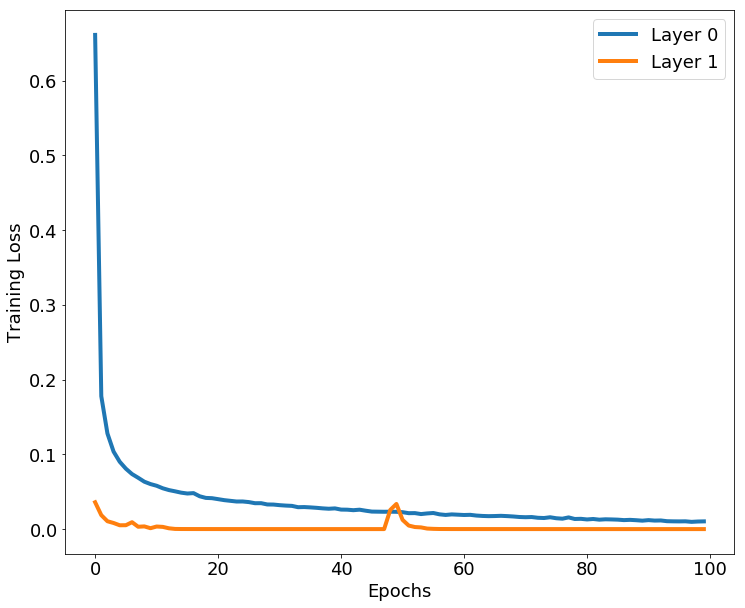

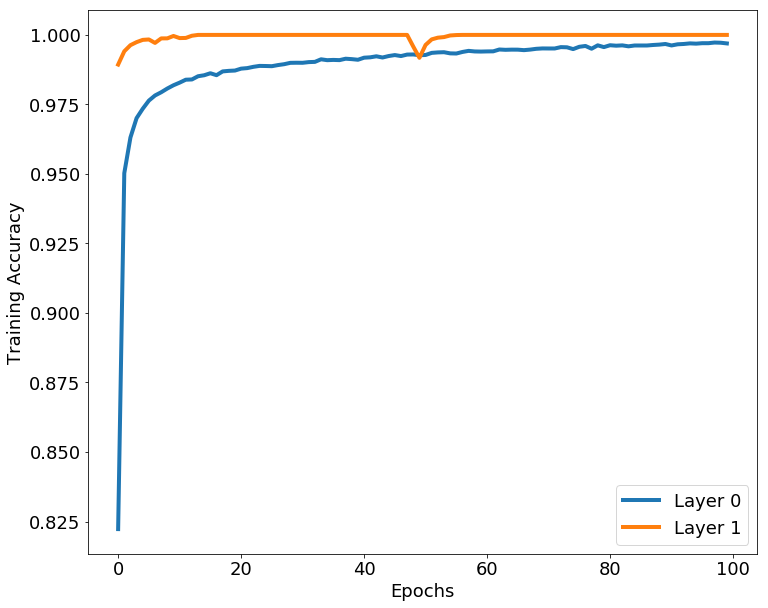

In [21]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Run test suite and visualize

In [30]:
#set network to inference mode
branchyNet.testing()
branchyNet.verbose = False
if cuda.available:
    branchyNet.to_gpu()
g_baseacc, g_basediff, _, _ = utils.test(branchyNet, x_test, y_test, main=True, batchsize=TEST_BATCHSIZE)
g_basediff = (g_basediff / float(len(y_test))) * 1000.

#branchyNet.to_cpu()
c_baseacc, c_basediff, _, _ = utils.test(branchyNet, x_test, y_test, main=True, batchsize=TEST_BATCHSIZE)
c_basediff = (c_basediff / float(len(y_test))) * 1000.

In [29]:
# Specify thresholds
thresholds = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1., 2., 3., 5., 10.]
# the best thresholds from brandynet.
#thresholds = [0.025]

In [ ]:
#GPU
if cuda.available:
    branchyNet.to_gpu()
g_ts, g_accs, g_diffs, g_exits = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                    batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
g_diffs *= 1000.


In [ ]:
import matplotlib as plt
import numpy as np

print(g_accs)
print(g_diffs)
print(g_ts)
print(g_exits)
print(g_baseacc)
print(g_basediff)

tmp = np.array(g_accs)
#print(plt.rcParams.keys())

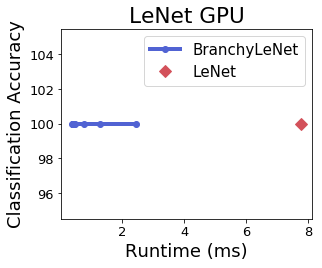

In [19]:
visualize.plot_line_tradeoff(g_accs, g_diffs, g_ts, g_exits, g_baseacc, g_basediff, all_samples=False, inc_amt=-0.0001,
                             our_label='BranchyLeNet', orig_label='LeNet', xlabel='Runtime (ms)', 
                             title='LeNet GPU', output_path='_figs/lenet_gpu.pdf')

In [31]:
#CPU
branchyNet.to_cpu()
c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                       batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
c_diffs *= 1000.

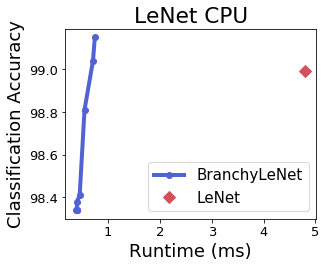

In [32]:
visualize.plot_line_tradeoff(c_accs, c_diffs, c_ts, c_exits, c_baseacc, c_basediff, all_samples=False, inc_amt=-0.0001,
                             our_label='BranchyLeNet', orig_label='LeNet', xlabel='Runtime (ms)',
                             title='LeNet CPU', output_path='_figs/lenet_cpu.pdf')

In [33]:
print 'CPU Results:'
utils.branchy_table_results('LeNet', c_baseacc, c_basediff, c_accs, c_diffs, c_exits, c_ts)

print '\n\n'

print 'GPU Results:'
utils.branchy_table_results('LeNet-MNIST', g_baseacc, g_basediff, g_accs, c_diffs, g_exits, g_ts)

CPU Results:
        Network        Acc.(%)       Time(ms)           Gain      Thrshld.T        Exit(%)
          LeNet          98.99           4.80              -              -              -
        B-LeNet          99.05           3.37           1.42       {0.0001}{68.47999999999999, 31.52}
        B-LeNet          99.06           1.56           3.08       {0.0005} {78.33, 21.67}
        B-LeNet          99.07           1.21           3.96        {0.001}{81.76, 18.240000000000002}
        B-LeNet          99.10           1.00           4.81        {0.005} {88.23, 11.77}
        B-LeNet          99.12           1.06           4.51         {0.01}  {90.41, 9.59}
        B-LeNet          99.14           0.88           5.42        {0.025}    {92.9, 7.1}
        B-LeNet          99.14           0.78           6.18         {0.05}  {94.33, 5.67}
        B-LeNet          99.13           0.83           5.79        {0.075}{95.06, 4.9399999999999995}
        B-LeNet          99.15           0

Save model/data

In [34]:
import dill
branchyNet.to_cpu()
with open("_models/lenet_mnist_0.0001.bn", "wb") as f:
    dill.dump(branchyNet, f)
with open("_models/lenet_mnist_gpu_results.pkl", "wb") as f:
    dill.dump({'accs': g_accs, 'rt': g_diffs, 'exits': g_exits, 'ts': g_ts, 'baseacc': g_baseacc, 'basediff': g_basediff}, f)
with open("_models/lenet_mnist_cpu_results.pkl", "wb") as f:
    dill.dump({'accs': c_accs, 'rt': c_diffs, 'exits': c_exits, 'ts': c_ts, 'baseacc': c_baseacc, 'basediff': c_basediff}, f)

In [24]:
import dill
with open("_models/lenet_mnist_gpu_results.pkl", "rb") as f:
    gpu_res = dill.load(f)
with open("_models/lenet_mnist_cpu_results.pkl", "rb") as f:
    cpu_res = dill.load(f)